In [45]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
import pickle
import seg_metrics.seg_metrics as sg
import json
import SimpleITK as sitk
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from os.path import expanduser

#### compare the prediction from nnU-Net with the PET ground truth

In [46]:
MODEL_CONFIG_SUFFIX = ''  # specify '' or '/2d' i.e. none means 3d_fullres

#### load the metrics

In [47]:
ANALYSIS_DIR = '/home/daryl/analysis{}'.format(MODEL_CONFIG_SUFFIX)
ANALYSIS_FILE = '{}/nnunet-metrics-final.pkl'.format(ANALYSIS_DIR)

In [48]:
if os.path.isfile(ANALYSIS_FILE):
    with open(ANALYSIS_FILE, 'rb') as f:
        analysis_d = pickle.load(f)
        print('loaded {} patients from {}'.format(len(analysis_d), ANALYSIS_FILE))

loaded 6 patients from /home/daryl/analysis/2d/nnunet-metrics-final.pkl


In [49]:
print('{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}'.format('patient ID', 'dataset', 'test ID', '', '', '', 'nnU-Net', '', '', '', 'CTVI-Jac'))
print('{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}'.format('', '', '', 'high', 'medium', 'low', 'mean', 'high', 'medium', 'low', 'mean'))
print('-'*110)

metadata_d = {'patient_id':[],'dataset_id':[],'test_id':[]}
ctvi_jac_DSC_d = {'high':[],'medium':[],'low':[],'mean':[]}
ctvi_hu_DSC_d = {'high':[],'medium':[],'low':[],'mean':[]}
nnunet_DSC_d = {'high':[],'medium':[],'low':[],'mean':[]}
ctvi_jac_HD95_d = {'high':[],'medium':[],'low':[],'mean':[]}
ctvi_hu_HD95_d = {'high':[],'medium':[],'low':[],'mean':[]}
nnunet_HD95_d = {'high':[],'medium':[],'low':[],'mean':[]}

df_l = []

for key,value in sorted(analysis_d.items()):
    # shorthand variables
    ctvi_jac_d = value['ctvi_jac_d']
    ctvi_hu_d = value['ctvi_hu_d']
    nnunet_d = value['nnunet_d']

    # metadata
    metadata_d['patient_id'].append(key)
    metadata_d['dataset_id'].append(value['dataset_id'])
    metadata_d['test_id'].append(value['test_id'])
    
    # DSC comparison
    ctvi_jac_DSC_d['high'].append(ctvi_jac_d['DSC_high'])
    ctvi_jac_DSC_d['medium'].append(ctvi_jac_d['DSC_medium'])
    ctvi_jac_DSC_d['low'].append(ctvi_jac_d['DSC_low'])
    ctvi_jac_DSC_mean = np.mean([ctvi_jac_d['DSC_high'],ctvi_jac_d['DSC_medium'],ctvi_jac_d['DSC_low']])
    ctvi_jac_DSC_d['mean'].append(ctvi_jac_DSC_mean)
    
    ctvi_hu_DSC_d['high'].append(ctvi_hu_d['DSC_high'])
    ctvi_hu_DSC_d['medium'].append(ctvi_hu_d['DSC_medium'])
    ctvi_hu_DSC_d['low'].append(ctvi_hu_d['DSC_low'])
    ctvi_hu_DSC_mean = np.mean([ctvi_hu_d['DSC_high'],ctvi_hu_d['DSC_medium'],ctvi_hu_d['DSC_low']])
    ctvi_hu_DSC_d['mean'].append(ctvi_hu_DSC_mean)
    
    nnunet_DSC_d['high'].append(nnunet_d['DSC_high'])
    nnunet_DSC_d['medium'].append(nnunet_d['DSC_medium'])
    nnunet_DSC_d['low'].append(nnunet_d['DSC_low'])
    nnunet_DSC_mean = np.mean([nnunet_d['DSC_high'],nnunet_d['DSC_medium'],nnunet_d['DSC_low']])
    nnunet_DSC_d['mean'].append(nnunet_DSC_mean)
    
    # HD95 comparison
    ctvi_jac_HD95_d['high'].append(ctvi_jac_d['HD95_high'])
    ctvi_jac_HD95_d['medium'].append(ctvi_jac_d['HD95_medium'])
    ctvi_jac_HD95_d['low'].append(ctvi_jac_d['HD95_low'])
    ctvi_jac_HD95_mean = np.mean([ctvi_jac_d['HD95_high'],ctvi_jac_d['HD95_medium'],ctvi_jac_d['HD95_low']])
    ctvi_jac_HD95_d['mean'].append(ctvi_jac_HD95_mean)
    
    ctvi_hu_HD95_d['high'].append(ctvi_hu_d['HD95_high'])
    ctvi_hu_HD95_d['medium'].append(ctvi_hu_d['HD95_medium'])
    ctvi_hu_HD95_d['low'].append(ctvi_hu_d['HD95_low'])
    ctvi_hu_HD95_mean = np.mean([ctvi_hu_d['HD95_high'],ctvi_hu_d['HD95_medium'],ctvi_hu_d['HD95_low']])
    ctvi_hu_HD95_d['mean'].append(ctvi_hu_HD95_mean)
    
    nnunet_HD95_d['high'].append(nnunet_d['HD95_high'])
    nnunet_HD95_d['medium'].append(nnunet_d['HD95_medium'])
    nnunet_HD95_d['low'].append(nnunet_d['HD95_low'])
    nnunet_HD95_mean = np.mean([nnunet_d['HD95_high'],nnunet_d['HD95_medium'],nnunet_d['HD95_low']])
    nnunet_HD95_d['mean'].append(nnunet_HD95_mean)
    
    print('{: >10}{: >10}{: >10}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}'.format(key, value['dataset_id'], value['test_id'], 
                                                                                 nnunet_d['DSC_high'], nnunet_d['DSC_medium'], nnunet_d['DSC_low'], nnunet_DSC_mean,
                                                                                 ctvi_jac_d['DSC_high'], ctvi_jac_d['DSC_medium'], ctvi_jac_d['DSC_low'], ctvi_jac_DSC_mean
                                                                                )
         )
print('-'*110)
print('{: >10}{: >10}{: >10}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}'.format('means', '', '', 
                                                                             np.mean(nnunet_DSC_d['high']), np.mean(nnunet_DSC_d['medium']), np.mean(nnunet_DSC_d['low']), np.mean(nnunet_DSC_d['mean']),
                                                                             np.mean(ctvi_jac_DSC_d['high']), np.mean(ctvi_jac_DSC_d['medium']), np.mean(ctvi_jac_DSC_d['low']), np.mean(ctvi_jac_DSC_d['mean'])
                                                                            )
     )

patient ID   dataset   test ID                                 nnU-Net                                CTVI-Jac
                                    high    medium       low      mean      high    medium       low      mean
--------------------------------------------------------------------------------------------------------------
         2       161         1      0.59      0.56      0.58      0.58      0.39      0.47      0.56      0.47
         4       160         0      0.68      0.67      0.65      0.67      0.68      0.54      0.65      0.62
         7       162         1      0.64      0.62      0.45      0.57      0.66      0.56      0.71      0.64
         9       160         1      0.72      0.65      0.67      0.68      0.65      0.59      0.62      0.62
        11       161         0      0.68      0.63      0.73      0.68      0.72      0.65      0.73      0.70
        14       162         0      0.76      0.73      0.86      0.78      0.67      0.58      0.74      0.66
-

#### box plot for DSC

In [50]:
boxplot_nnunet = []
boxplot_nnunet.append(nnunet_DSC_d['high'])
boxplot_nnunet.append(nnunet_DSC_d['medium'])
boxplot_nnunet.append(nnunet_DSC_d['low'])

boxplot_jac = []
boxplot_jac.append(ctvi_jac_DSC_d['high'])
boxplot_jac.append(ctvi_jac_DSC_d['medium'])
boxplot_jac.append(ctvi_jac_DSC_d['low'])

boxplot_hu = []
boxplot_hu.append(ctvi_hu_DSC_d['high'])
boxplot_hu.append(ctvi_hu_DSC_d['medium'])
boxplot_hu.append(ctvi_hu_DSC_d['low'])

In [51]:
print('high-function DSC mean (range)')
print('nnU-Net{} = {:0.2f} ({:0.2f} to {:0.2f})'.format(MODEL_CONFIG_SUFFIX.replace('/','-'), np.mean(boxplot_nnunet[0]), np.min(boxplot_nnunet[0]), np.max(boxplot_nnunet[0])))
print('Jac = {:0.2f} ({:0.2f} to {:0.2f})'.format(np.mean(boxplot_jac[0]), np.min(boxplot_jac[0]), np.max(boxplot_jac[0])))
print('HU = {:0.2f} ({:0.2f} to {:0.2f})'.format(np.mean(boxplot_hu[0]), np.min(boxplot_hu[0]), np.max(boxplot_hu[0])))

high-function DSC mean (range)
nnU-Net-2d = 0.68 (0.59 to 0.76)
Jac = 0.63 (0.39 to 0.72)
HU = 0.60 (0.42 to 0.69)


In [52]:
analysis_d

{4: {'dataset_id': 160,
  'test_id': 0,
  'nnunet_d': {'confusion_matrix': array([[0.63, 0.32, 0.05],
          [0.12, 0.75, 0.14],
          [0.05, 0.34, 0.61]]),
   'DSC_low': 0.65,
   'DSC_medium': 0.67,
   'DSC_high': 0.68,
   'HD95_low': 9.9,
   'HD95_medium': 16.16,
   'HD95_high': 25.51},
  'ctvi_jac_d': {'confusion_matrix': array([[0.68, 0.27, 0.05],
          [0.24, 0.54, 0.22],
          [0.01, 0.34, 0.65]]),
   'DSC_low': 0.65,
   'DSC_medium': 0.54,
   'DSC_high': 0.68,
   'HD95_low': 10.82,
   'HD95_medium': 15.13,
   'HD95_high': 26.5},
  'ctvi_hu_d': {'confusion_matrix': array([[0.6 , 0.3 , 0.1 ],
          [0.26, 0.51, 0.24],
          [0.06, 0.36, 0.58]]),
   'DSC_low': 0.58,
   'DSC_medium': 0.51,
   'DSC_high': 0.6,
   'HD95_low': 10.95,
   'HD95_medium': 15.81,
   'HD95_high': 24.33}},
 9: {'dataset_id': 160,
  'test_id': 1,
  'nnunet_d': {'confusion_matrix': array([[0.69, 0.22, 0.09],
          [0.16, 0.67, 0.17],
          [0.01, 0.32, 0.68]]),
   'DSC_low': 0.67,

In [53]:
import pandas as pd
rows_l = []
for patient_id in analysis_d.keys():
    patient_d = analysis_d[patient_id]
    for model in ['nnunet','ctvi_jac','ctvi_hu']:
        for metric in ['DSC','HD95']:
            for subregion in ['high','medium','low']:
                d = {'patient_id':patient_id, 'dataset_id':patient_d['dataset_id'], 'test_id':patient_d['test_id']}
                d['model'] = model
                d['metric'] = metric
                d['subregion'] = subregion
                d['value'] = patient_d[model+'_d'][metric+'_'+subregion]
                rows_l.append(d)
analysis_df = pd.DataFrame(rows_l)

In [54]:
analysis_df.head(100)

,patient_id,dataset_id,test_id,model,metric,subregion,value
0,4,160,0,nnunet,DSC,high,0.68
1,4,160,0,nnunet,DSC,medium,0.67
2,4,160,0,nnunet,DSC,low,0.65
3,4,160,0,nnunet,HD95,high,25.51
4,4,160,0,nnunet,HD95,medium,16.16
...,...,...,...,...,...,...,...
95,7,162,1,nnunet,HD95,low,19.10
96,7,162,1,ctvi_jac,DSC,high,0.66
97,7,162,1,ctvi_jac,DSC,medium,0.56
98,7,162,1,ctvi_jac,DSC,low,0.71


In [55]:
def box_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    mask = (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
    series = series[mask]
    return series

In [56]:
label_offsets = {'nnunet':-0.23, 'ctvi_jac':0.04, 'ctvi_hu':0.30}
plot_x = {'high':0, 'medium':1, 'low':2}

In [57]:
dsc_analysis_df = analysis_df[analysis_df['metric']=='DSC']

In [58]:
params = {}
params['font.size'] = 18
params['figure.dpi'] = 150
params['figure.figsize'] = 9,7

plt.rcParams.update(params)

saved figure to /home/daryl/figures/ctvi-nnunet-2d-jac-hu-DSC-boxplot.svg


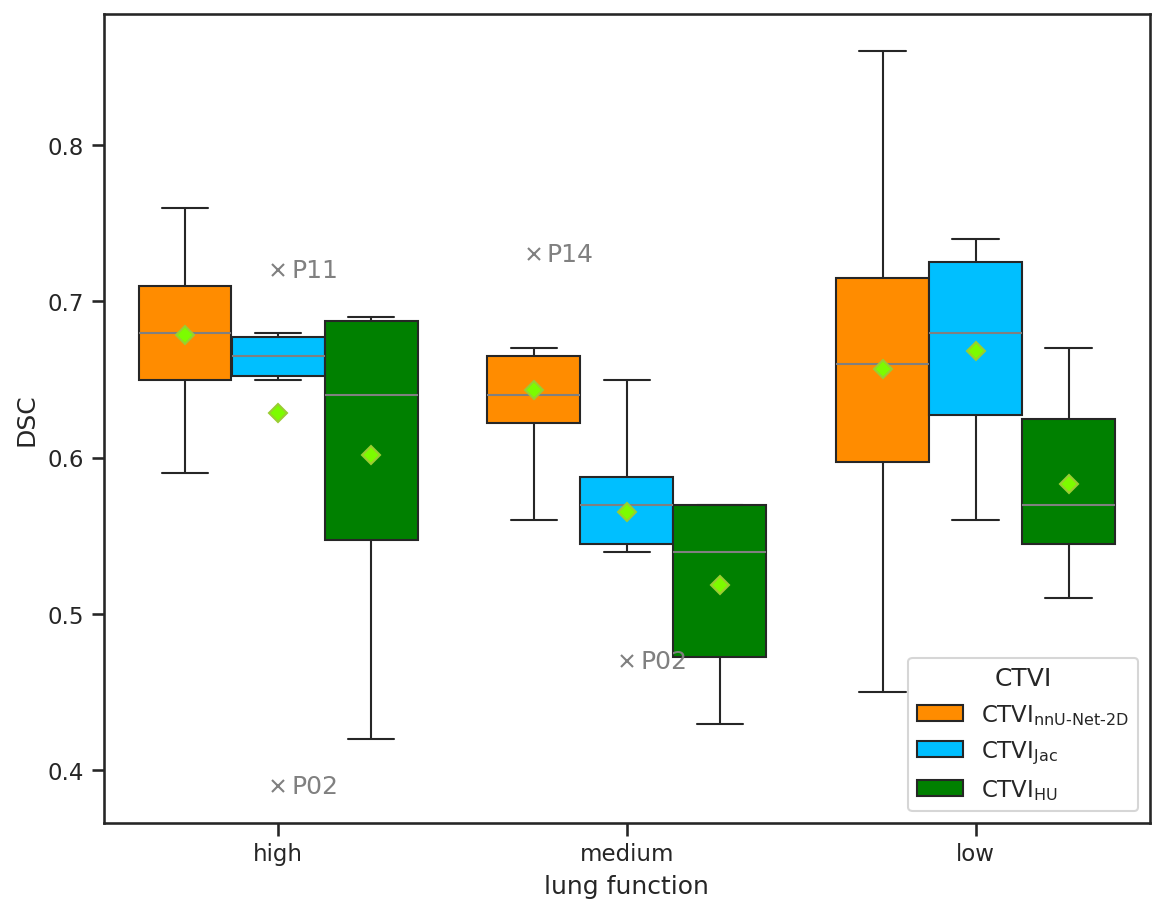

In [59]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

bp = sns.boxplot(x="subregion", y="value",
                 hue="model", palette=['darkorange','deepskyblue','green'], 
                 flierprops=dict(markerfacecolor='lightgrey', marker='x', markeredgecolor='grey'),
                 medianprops={"color": "gray", "linewidth": 1}, 
                 meanprops=dict(markerfacecolor='lawngreen', marker='D', markeredgecolor='yellowgreen'),
                 saturation=1.0, 
                 showmeans=True,
                 legend=True,
                 data=dsc_analysis_df)

# label the outliers
for model in label_offsets.keys():
    for subregion_idx,subregion in enumerate(['high','medium','low']):
        df = dsc_analysis_df[(dsc_analysis_df['model'] == model) & (dsc_analysis_df['subregion'] == subregion)]
        outliers = box_outliers(df.value)
        for o in outliers:
            patient_id = df.iloc[(df['value'] - o).abs().argsort()[:1]].patient_id.iloc[0]
            plt.text(plot_x[subregion]+label_offsets[model], o, 'P{:02d}'.format(patient_id), ha='left', va='center', fontsize=12, color='grey')

# modify the legend
legend = bp.get_legend()
legend.set_title('CTVI')
if MODEL_CONFIG_SUFFIX == '':
    new_labels = [r'CTVI$_\text{nnU-Net}$', r'CTVI$_\text{Jac}$', r'CTVI$_\text{HU}$']
else:
    new_labels = [r'CTVI$_\text{nnU-Net-2D}$', r'CTVI$_\text{Jac}$', r'CTVI$_\text{HU}$']
for t, l in zip(legend.texts, new_labels):
    t.set_text(l)
legend.set_loc('lower right')

_ = bp.set_xlabel('lung function')
_ = bp.set_ylabel('DSC')

fig_filename = '{}/figures/ctvi-nnunet{}-jac-hu-DSC-boxplot.svg'.format(expanduser('~'), MODEL_CONFIG_SUFFIX.replace('/','-'))
plt.savefig(fig_filename, format='svg', dpi=600, bbox_inches='tight')
print('saved figure to {}'.format(fig_filename))

#### box plot for HD95

In [60]:
boxplot_nnunet = []
boxplot_nnunet.append(nnunet_HD95_d['high'])
boxplot_nnunet.append(nnunet_HD95_d['medium'])
boxplot_nnunet.append(nnunet_HD95_d['low'])

boxplot_jac = []
boxplot_jac.append(ctvi_jac_HD95_d['high'])
boxplot_jac.append(ctvi_jac_HD95_d['medium'])
boxplot_jac.append(ctvi_jac_HD95_d['low'])

boxplot_hu = []
boxplot_hu.append(ctvi_hu_HD95_d['high'])
boxplot_hu.append(ctvi_hu_HD95_d['medium'])
boxplot_hu.append(ctvi_hu_HD95_d['low'])

In [61]:
print('high-function HD95 mean (range)')
print('nnU-Net{} = {:0.2f} ({:0.2f} to {:0.2f})'.format(MODEL_CONFIG_SUFFIX.replace('/','-'), np.mean(boxplot_nnunet[0]), np.min(boxplot_nnunet[0]), np.max(boxplot_nnunet[0])))
print('Jac = {:0.2f} ({:0.2f} to {:0.2f})'.format(np.mean(boxplot_jac[0]), np.min(boxplot_jac[0]), np.max(boxplot_jac[0])))
print('HU = {:0.2f} ({:0.2f} to {:0.2f})'.format(np.mean(boxplot_hu[0]), np.min(boxplot_hu[0]), np.max(boxplot_hu[0])))

high-function HD95 mean (range)
nnU-Net-2d = 31.75 (16.40 to 74.73)
Jac = 33.40 (22.72 to 62.83)
HU = 32.01 (24.04 to 51.92)


In [62]:
hd95_analysis_df = analysis_df[analysis_df['metric']=='HD95']

In [63]:
params = {}
params['font.size'] = 18
params['figure.dpi'] = 150
params['figure.figsize'] = 9,7

plt.rcParams.update(params)

saved figure to /home/daryl/figures/ctvi-nnunet-2d-jac-hu-HD95-boxplot.svg


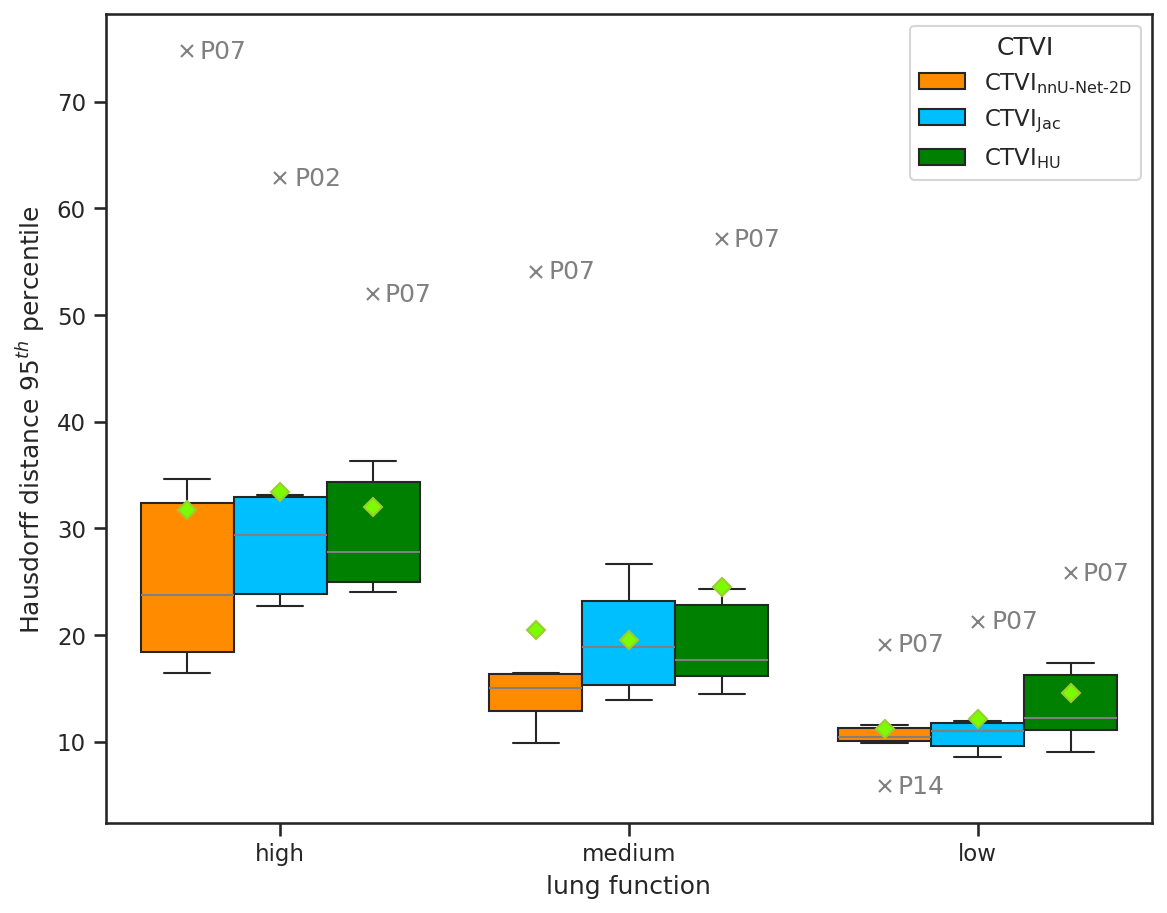

In [64]:
sns.set_theme(style="ticks", palette="pastel")

bp = sns.boxplot(x="subregion", y="value",
                 hue="model", palette=['darkorange','deepskyblue','green'], 
                 flierprops=dict(markerfacecolor='lightgrey', marker='x', markeredgecolor='grey'),
                 medianprops={"color": "gray", "linewidth": 1}, 
                 meanprops=dict(markerfacecolor='lawngreen', marker='D', markeredgecolor='yellowgreen'),
                 saturation=1.0, 
                 showmeans=True,
                 legend=True,
                 data=hd95_analysis_df)

# label the outliers
for model in label_offsets.keys():
    for subregion_idx,subregion in enumerate(['high','medium','low']):
        df = hd95_analysis_df[(hd95_analysis_df['model'] == model) & (hd95_analysis_df['subregion'] == subregion)]
        outliers = box_outliers(df.value)
        for o in outliers:
            patient_id = df.iloc[(df['value'] - o).abs().argsort()[:1]].patient_id.iloc[0]
            plt.text(plot_x[subregion]+label_offsets[model], o, 'P{:02d}'.format(patient_id), ha='left', va='center', fontsize=12, color='grey')

# modify the legend
legend = bp.get_legend()
legend.set_title('CTVI')
if MODEL_CONFIG_SUFFIX == '':
    new_labels = [r'CTVI$_\text{nnU-Net}$', r'CTVI$_\text{Jac}$', r'CTVI$_\text{HU}$']
else:
    new_labels = [r'CTVI$_\text{nnU-Net-2D}$', r'CTVI$_\text{Jac}$', r'CTVI$_\text{HU}$']
for t, l in zip(legend.texts, new_labels):
    t.set_text(l)

_ = bp.set_xlabel('lung function')
_ = bp.set_ylabel('Hausdorff distance 95$^{th}$ percentile')

fig_filename = '{}/figures/ctvi-nnunet{}-jac-hu-HD95-boxplot.svg'.format(expanduser('~'), MODEL_CONFIG_SUFFIX.replace('/','-'))
plt.savefig(fig_filename, format='svg', dpi=600, bbox_inches='tight')
print('saved figure to {}'.format(fig_filename))